<a href="https://colab.research.google.com/github/smit585/SelfDrivingCar/blob/master/Course%201%20Introduction%20to%20Self%20Driving%20Car/%20Week%204%20Vehicle%20Dynamimc%20Modeling/%20Kinematic%20Bicycle%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
class Bicycle():
    def __init__(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
        
        self.L = 2
        self.lr = 1.2
        self.w_max = 1.22
        
        self.sample_time = 0.01
        
    def reset(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0

In [0]:
class Bicycle(Bicycle):
    def step(self, v, w):
        # ==================================
        #  Implement kinematic model here
        # ==================================
        self.xc = self.xc + v * np.cos(self.theta + self.beta) * self.sample_time
        self.yc = self.yc + v * np.sin(self.theta + self.beta) * self.sample_time
        self.theta = self.theta + ((v * np.cos(self.beta) * np.tan(self.delta))/self.L) * self.sample_time
        self.delta = self.delta + w*self.sample_time
        self.beta = np.arctan(self.lr*np.tan(self.delta)/self.L)

        pass

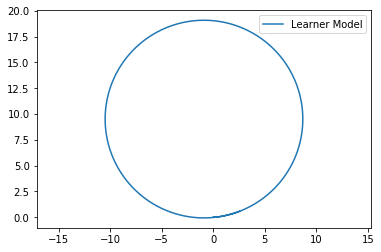

In [0]:
sample_time = 0.01
time_end = 20
model = Bicycle()

model.reset()
t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)


for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    if model.delta < np.arctan(2/10):
        model.step(np.pi, model.w_max)
    else:
        model.step(np.pi, 0)  

plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.legend()
plt.show()

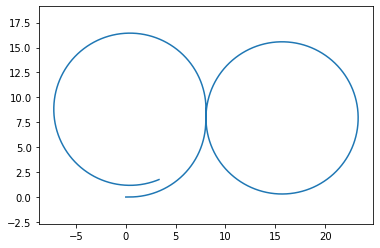

In [0]:
sample_time = 0.01
time_end = 30
model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
w_data = np.zeros_like(t_data)

v_data[:] = (16 * np.pi)/15

# ==================================
#  Learner solution begins here
# ==================================
model.xc = 0
model.yc = 0

for i in range(t_data.shape[0]):
    x_data[i] = model.xc 
    y_data[i] = model.yc
    
    if i < 352 or i > 1800:
        if model.delta < np.arctan(2/8):
            model.step(v_data[i], model.w_max)
            w_data[i] = model.w_max
        else:
            model.step(v_data[i], 0)
            w_data[i] = 0
    else:
        if model.delta > -np.arctan(2/8):
            model.step(v_data[i],-model.w_max)
            w_data[i] = -model.w_max
        else:
            model.step(v_data[i],0)
            w_data[i] = 0
    
#     print("i = ",i)
#     print("model.xc = ",x_data[i])
#     print("model.yc = ",y_data[i])
    
    model.beta = 0
    
    
# ==================================
#  Learner solution ends here
# ==================================
plt.axis('equal')
plt.plot(x_data, y_data)
plt.show()

In [0]:
t_data[352]

3.52

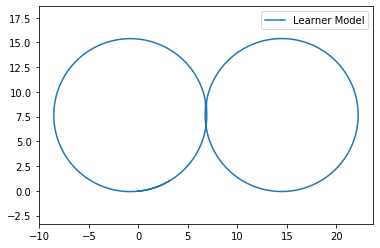

In [0]:
sample_time = 0.01
time_end = 30
model = Bicycle()

model.reset()
t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)


# maintain velocity at 4 m/s
v_data = np.zeros_like(t_data)
v_data[:] = (16*np.pi)/15

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    t = t_data[i]
    if t < 3.52 or t > 18:
        if model.delta < np.arctan(2/8):
            model.step(v_data[i], model.w_max)
            w_data[i] = model.w_max
        else:
            model.step(v_data[i], 0)
            w_data[i] = 0
    else:
        if model.delta > -np.arctan(2/8):
            model.step(v_data[i], -model.w_max)
            w_data[i] = -model.w_max
        else:
            model.step(v_data[i], 0)
            w_data[i] = 0
    
    #model.beta = 0
    
plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.legend()
plt.show()